In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  


In [11]:
# Load dataset
df = pd.read_csv(r"C:\Users\SMART TECH\Desktop\ML\AML_Ass01\AML_Ass01\Linear Regression\linear_regression_dataset.csv")  # Update with correct filename

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values (fill with mean or drop)
df.fillna(df.mean(), inplace=True)  # Filling numerical columns with mean


Missing Values:
 House_Age                  32
Num_Bedrooms               27
Area_Sqft                  35
Distance_to_City_Center    19
House_Price                32
dtype: int64


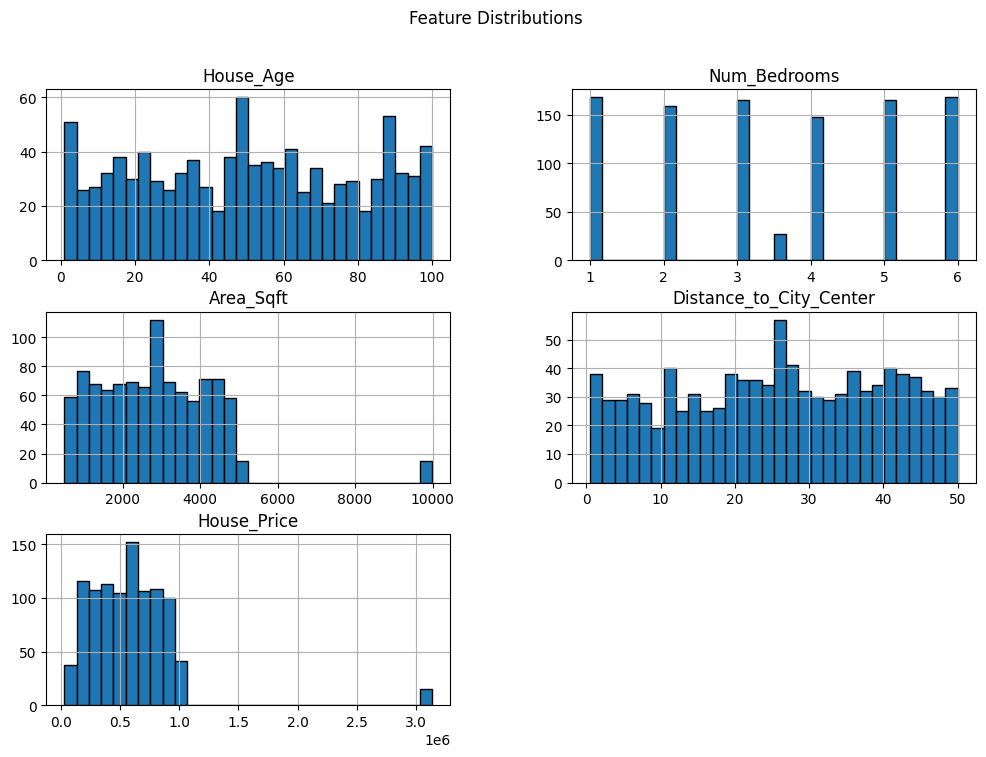

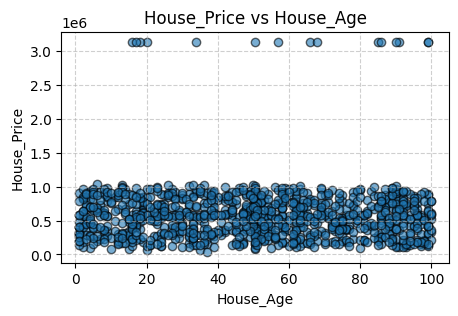

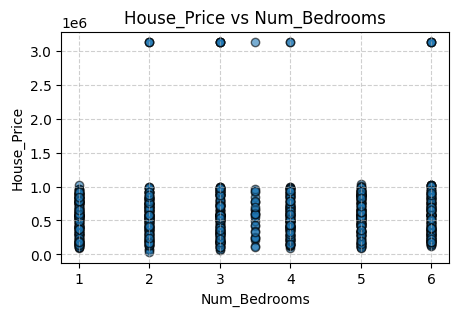

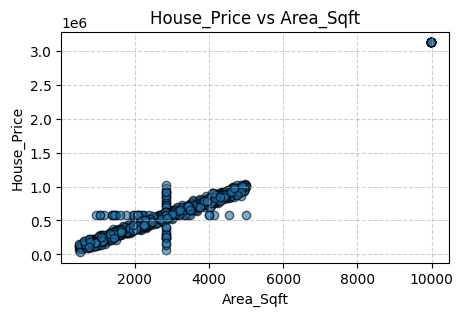

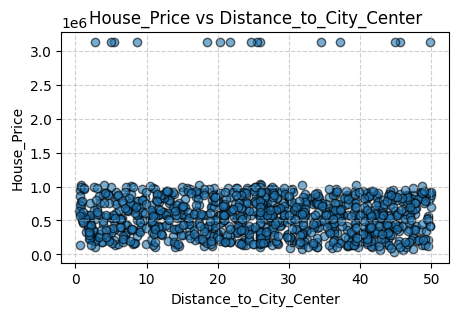

In [12]:
# Visualizing numerical feature distributions  
df.hist(figsize=(12, 8), bins=30, edgecolor='black')  
plt.suptitle("Feature Distributions")  
plt.show()  


# Plot relationships with the target variable (House_Price)  
for col in df.columns:  
    if col != "House_Price":  
        plt.figure(figsize=(5, 3))  
        plt.scatter(df[col], df["House_Price"], alpha=0.6, edgecolors='black')  
        plt.xlabel(col)  
        plt.ylabel("House_Price")  
        plt.title(f"House_Price vs {col}")  
        plt.grid(True, linestyle='--', alpha=0.6)  
        plt.show()  


In [13]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

for col in df.select_dtypes(include=[np.number]).columns:
    df = remove_outliers(df, col)
df.tail(2)

,House_Age,Num_Bedrooms,Area_Sqft,Distance_to_City_Center,House_Price
998,100.0,4.0,3947.0,6.51,782436.30
999,86.0,4.0,2262.0,31.91,432428.09


In [14]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.drop("House_Price")
for col in numerical_cols:
    mean_val = df[col].mean()
    std_val = df[col].std()
    df[col] = (df[col] - mean_val) / std_val


Feature Correlations with House_Price:
 House_Price                1.000000
Area_Sqft                  0.955854
Num_Bedrooms               0.028723
Distance_to_City_Center   -0.036232
House_Age                 -0.040870
Name: House_Price, dtype: float64


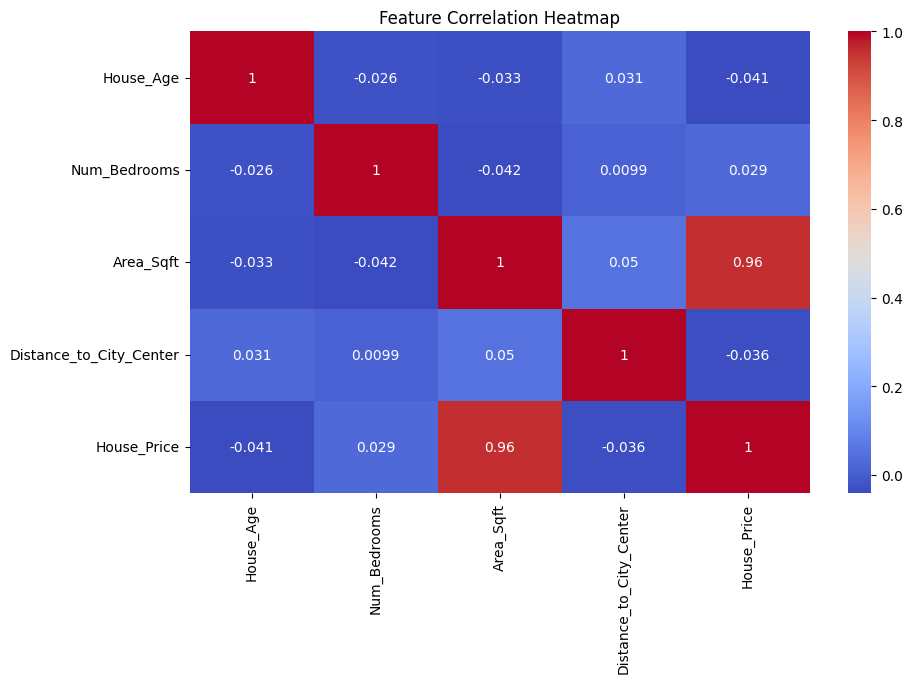

In [17]:
import seaborn as sns

corr_matrix = df.corr()
print("Feature Correlations with House_Price:\n", corr_matrix["House_Price"].sort_values(ascending=False))

# Visualizing correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [19]:
for col in numerical_cols:
    df[f"{col}_sq"] = df[col] ** 2


In [20]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["House_Price"])
y = df["House_Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}, R²: {r2}")


MAE: 33714.93747163914, MSE: 5476917179.621802, R²: 0.9132216545672034


In [ ]:
# Define new house data (replace values with real test data)
new_house = {
    "House_Age": [10], 
    "Num_Bedrooms": [3],  
    "Area_Sqft": [3000],
    "Distance_to_City_Center": [5]
}
new_house_df = pd.DataFrame(new_house)
means = X_train[numerical_cols].mean()
stds = X_train[numerical_cols].std()
new_house_df[numerical_cols] = (new_house_df[numerical_cols] - means) / stds 
for col in numerical_cols:
    new_house_df[f"{col}_sq"] = new_house_df[col] ** 2
predicted_price_manual = model.predict(new_house_df)

print("Predicted House Price (Manual Z-score Scaling):", predicted_price_manual[0])

Predicted House Price (Manual Z-score Scaling): -2832094014.476593


In [33]:
class LinearRegressionGD:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Train and Evaluate
model_gd = LinearRegressionGD(lr=0.01, epochs=10000)
model_gd.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred_gd = model_gd.predict(X_test.to_numpy())

mae_gd = mean_absolute_error(y_test, y_pred_gd)
mse_gd = mean_squared_error(y_test, y_pred_gd)
r2_gd = r2_score(y_test, y_pred_gd)

print(f"Gradient Descent - MAE: {mae_gd}, MSE: {mse_gd}, R²: {r2_gd}")


Gradient Descent - MAE: 33714.932466048485, MSE: 5476917883.00633, R²: 0.9132216434225132


In [ ]:
new_house = {
    "House_Age": [10], 
    "Num_Bedrooms": [3],  
    "Area_Sqft": [3000],
    "Distance_to_City_Center": [5]
}
new_data = pd.DataFrame(new_house)
new_data[numerical_cols] = (new_data[numerical_cols] - means) / stds  
for col in numerical_cols:
    new_data[f"{col}_sq"] = new_data[col] ** 2

new_data_np = new_data.to_numpy()
predicted_price_gd = model_gd.predict(new_data_np)
print("Predicted House Price (Gradient Descent Model):", predicted_price_gd[0])


Predicted House Price (Gradient Descent Model): -2832094014.476593


c:\Users\SMART TECH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
print("Weights (Gradient Descent Model):", model_gd.weights)
print("Bias (Gradient Descent Model):", model_gd.bias)

print("Weights (Scikit-Learn Model):", model.coef_)
print("Bias (Scikit-Learn Model):", model.intercept_)


Weights (Gradient Descent Model): [   405.5228158   18019.52491692 245769.31239309 -21783.989316
  -4324.97066591   1701.94975209   -396.42958146  -1899.12922584]
Bias (Gradient Descent Model): 549232.3757491478
Weights (Scikit-Learn Model): [   405.52483117  18019.52718613 245769.31147798 -21783.99066877
  -4325.00464193   1701.9126876    -396.46005329  -1899.16121049]
Bias (Scikit-Learn Model): 549232.5304514276
